In [7]:
!pip install yfinance
!pip install PyPortfolioOpt
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 8.5 MB/s eta 0:00:00


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from pypfopt import risk_models,EfficientFrontier,expected_returns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#start and end data of the historical stock data
start_date = '2021-10-10'
end_date = '2024-12-21'


#Tickers from Yahoo finance to be used
stock_tickers = ['AAPL','TGT','MCD','IBM','TSLA']
ETF_tickers = ['BND','HYG','TIP','IEF','LQD']
FX_tickers = ['USDJPY=X','USDGBP=X','USDEUR=X','USDAUD=X','USDRUB=X']


### Downloading the tickers from Yahoo Finance
df_stocks = yf.download(stock_tickers,start=start_date,end=end_date)['Adj Close']
df_ETF = yf.download(ETF_tickers,start=start_date,end=end_date)['Adj Close']
df_FX = yf.download(FX_tickers,start=start_date,end=end_date)['Adj Close']


df_stocks.dropna(inplace=True)
df_ETF.dropna(inplace=True)
df_FX.dropna(inplace=True)

print(f'Returns on Stocks: {df_stocks.pct_change().dropna()}')
print(f'Returns on ETFS: {df_ETF.pct_change().dropna()}')
print(f'Returns on FX: {df_FX.pct_change().dropna()}')

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


Returns on Stocks: Ticker          AAPL       IBM       MCD       TGT      TSLA
Date                                                        
2021-10-12 -0.009103 -0.013761 -0.008354  0.006646  0.017400
2021-10-13 -0.004240  0.002065 -0.007648  0.028275  0.006652
2021-10-14  0.020226  0.018684  0.007830  0.022555  0.008926
2021-10-15  0.007513  0.008508 -0.009405  0.014953  0.030196
2021-10-18  0.011806 -0.015836  0.000041  0.032314  0.032122
...              ...       ...       ...       ...       ...
2024-12-16  0.011728 -0.006455  0.003742 -0.015388  0.061413
2024-12-17  0.009720 -0.001570 -0.005475 -0.006417  0.036370
2024-12-18 -0.021422 -0.038433 -0.017563 -0.006839 -0.082795
2024-12-19  0.007015  0.017032 -0.002235 -0.002066 -0.008997
2024-12-20  0.018816 -0.002501  0.008442  0.008050 -0.034642

[804 rows x 5 columns]
Returns on ETFS: Ticker           BND       HYG       IEF       LQD       TIP
Date                                                        
2021-10-12  0.003656  0.0

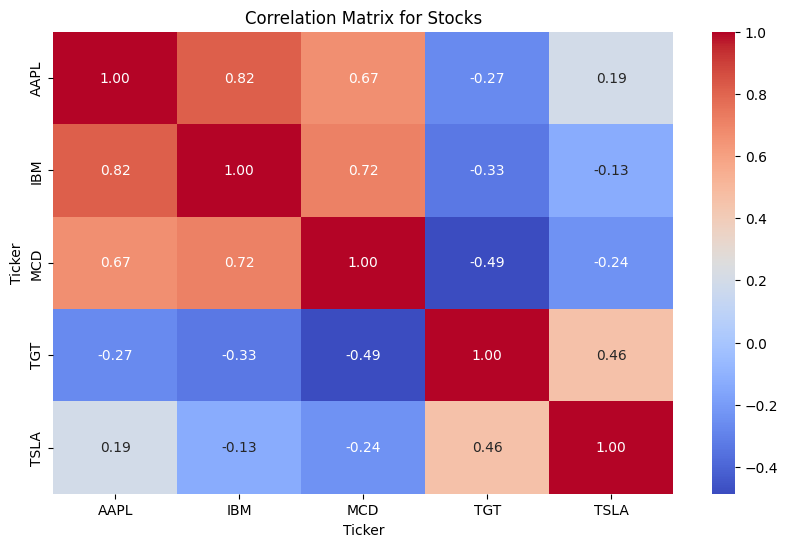

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_stocks.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title('Correlation Matrix for Stocks')
plt.show()


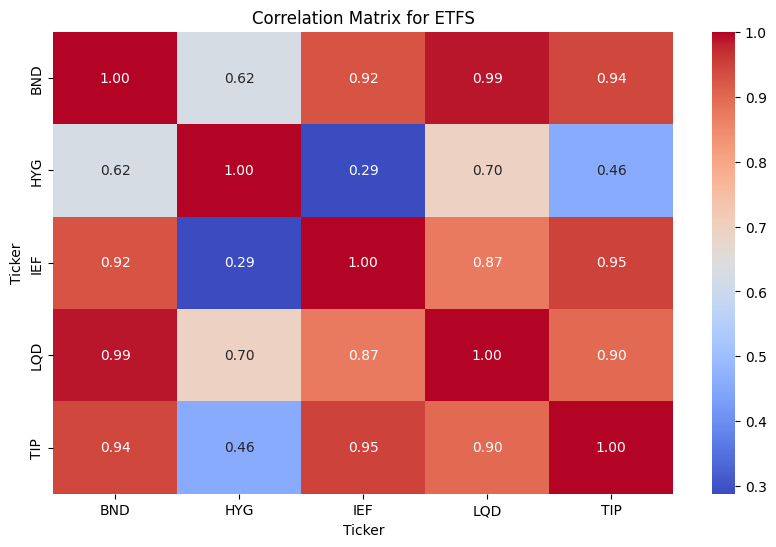

In [12]:

plt.figure(figsize=(10,6))
sns.heatmap(df_ETF.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title('Correlation Matrix for ETFS')
plt.show()

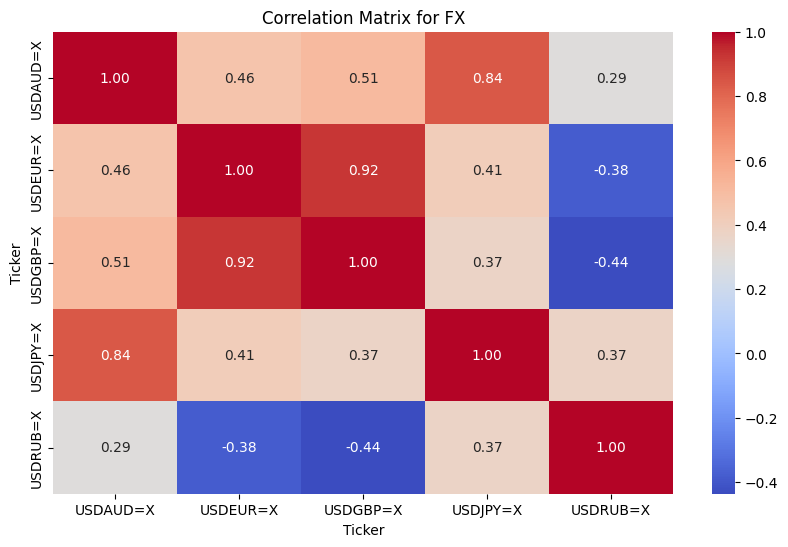

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_FX.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title('Correlation Matrix for FX')
plt.show()


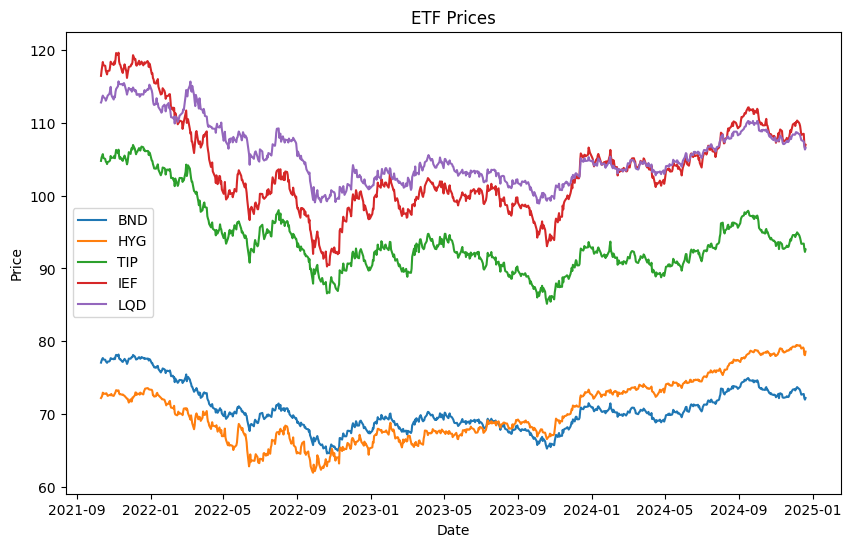

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_ETF)
plt.title('ETF Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(ETF_tickers)
plt.show()


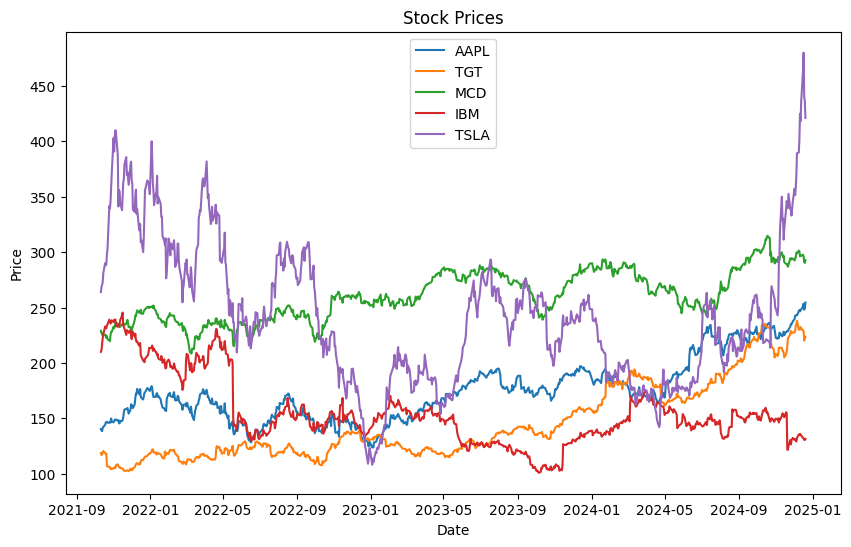

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df_stocks)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stock_tickers)
plt.show()

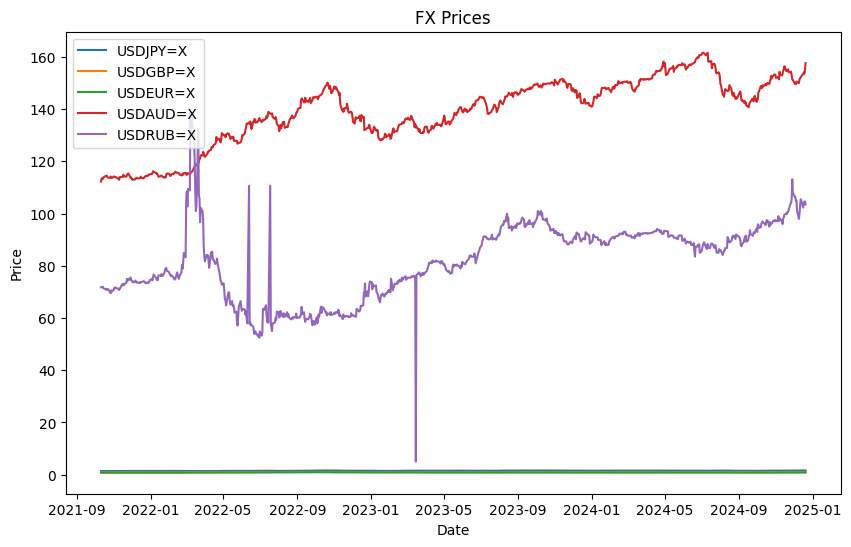

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df_FX)
plt.title('FX Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(FX_tickers)
plt.show()

In [17]:
#Expected Returns and Standard Deviation for stock data
mu_s = expected_returns.mean_historical_return(df_stocks)
S_cov = risk_models.sample_cov(df_stocks)
print(f'Expected Returns: {mu_s}')
print(f'Covariance Matrix: {S_cov}')

Expected Returns: Ticker
AAPL    0.205187
IBM     0.219339
MCD     0.079953
TGT    -0.136495
TSLA    0.157592
dtype: float64
Covariance Matrix: Ticker      AAPL       IBM       MCD       TGT      TSLA
Ticker                                                  
AAPL    0.072984  0.017025  0.016690  0.030911  0.081827
IBM     0.017025  0.047109  0.010761  0.018082  0.010469
MCD     0.016690  0.010761  0.029852  0.016052  0.016630
TGT     0.030911  0.018082  0.016052  0.143776  0.057537
TSLA    0.081827  0.010469  0.016630  0.057537  0.382563


In [18]:
#Expected returns and risk for ETFS

mu_ETF = expected_returns.mean_historical_return(df_ETF)
S_cov_ETF = risk_models.sample_cov(df_ETF)
print(f'Expected Returns: {mu_ETF}')
print(f'Covariance Matrix: {S_cov_ETF}')


Expected Returns: Ticker
BND   -0.020213
HYG    0.026852
IEF   -0.037933
LQD   -0.026228
TIP   -0.017702
dtype: float64
Covariance Matrix: Ticker       BND       HYG       IEF       LQD       TIP
Ticker                                                  
BND     0.004689  0.003503  0.005859  0.006325  0.003999
HYG     0.003503  0.007532  0.003678  0.005985  0.003045
IEF     0.005859  0.003678  0.007665  0.007606  0.005109
LQD     0.006325  0.005985  0.007606  0.009511  0.005356
TIP     0.003999  0.003045  0.005109  0.005356  0.005098


In [19]:
#expected return and risk for FX currency pairs
mu_FX = expected_returns.mean_historical_return(df_FX)
S_cov_FX = risk_models.sample_cov(df_FX)
print(f'Expected Returns: {mu_FX}')
print(f'Covariance Matrix: {S_cov_FX}')


Expected Returns: Ticker
USDAUD=X    0.048632
USDEUR=X    0.033685
USDGBP=X    0.026239
USDJPY=X    0.108006
USDRUB=X    0.117027
dtype: float64
Covariance Matrix: Ticker    USDAUD=X  USDEUR=X  USDGBP=X  USDJPY=X   USDRUB=X
Ticker                                                     
USDAUD=X  0.011496  0.005553  0.006875  0.004560  -0.035107
USDEUR=X  0.005553  0.006049  0.005457  0.003452  -0.014278
USDGBP=X  0.006875  0.005457  0.008245  0.004006  -0.013381
USDJPY=X  0.004560  0.003452  0.004006  0.010618   0.015734
USDRUB=X -0.035107 -0.014278 -0.013381  0.015734  62.796381


In [20]:
# efficient frontiers for ETFS,FX pairs, and stocks
ef_stocks = EfficientFrontier(mu_s, S_cov)
ef_ETF = EfficientFrontier(mu_ETF, S_cov_ETF)
ef_FX = EfficientFrontier(mu_FX, S_cov_FX)

#weights for stocks and sharpe ratio
weights_stocks = ef_stocks.max_sharpe()
cleaned_weights_stocks = ef_stocks.clean_weights()
print('weights for stock portfolio',cleaned_weights_stocks)
optimal_sharpe_stocks = ef_stocks.portfolio_performance()[2]
print('Optimal Sharpe Ratio for stocks: ',optimal_sharpe_stocks)

weights for stock portfolio OrderedDict([('AAPL', 0.30626), ('IBM', 0.6555), ('MCD', 0.03825), ('TGT', 0.0), ('TSLA', 0.0)])
Optimal Sharpe Ratio for stocks:  1.1224083371240345


In [21]:
#weights for ETFS
weights_etfs = ef_ETF.max_sharpe()
cleaned_weights_etfs = ef_ETF.clean_weights()
print('weights for ETF portfolio',cleaned_weights_etfs)
optimal_sharpe_etfs = ef_ETF.portfolio_performance()[2]
print('Optimal Sharpe Ratio for ETF: ',optimal_sharpe_etfs)

weights for ETF portfolio OrderedDict([('BND', 0.0), ('HYG', 1.0), ('IEF', 0.0), ('LQD', 0.0), ('TIP', 0.0)])
Optimal Sharpe Ratio for ETF:  0.30940670461277503


In [22]:
#weighrs and optimal sharpe ratio for FX

weights_FX = ef_FX.max_sharpe()
cleaned_weights_FX = ef_FX.clean_weights()
print('weights for FX portfolio',cleaned_weights_FX)
optimal_sharpe_FX = ef_FX.portfolio_performance()[2]
print('Optimal Sharpe Ratio for FX: ',optimal_sharpe_FX)

weights for FX portfolio OrderedDict([('USDAUD=X', 0.02289), ('USDEUR=X', 0.0), ('USDGBP=X', 0.0), ('USDJPY=X', 0.97711), ('USDRUB=X', 0.0)])
Optimal Sharpe Ratio for FX:  1.0484241840245205


In [23]:
### optimal expected returns: stocks,ect
optimal_expected_return_stock_portfolio = ef_stocks.portfolio_performance()[0]
volatility_of_optimal_stock_portfolio = ef_stocks.portfolio_performance()[1]
risk_free_rate = 0.01
sharpe_ratio_stocks = (optimal_expected_return_stock_portfolio - risk_free_rate) / volatility_of_optimal_stock_portfolio
print('Expected Returns on optimal risky(stock) portfolio: ', optimal_expected_return_stock_portfolio)
print('Standard Deviation (risk) of risky(stock) portfolio:',volatility_of_optimal_stock_portfolio)
print('Sharpe Ratio for optimal stock portfolio: ', sharpe_ratio_stocks)


Expected Returns on optimal risky(stock) portfolio:  0.20967397245070724
Standard Deviation (risk) of risky(stock) portfolio: 0.18680721223789046
Sharpe Ratio for optimal stock portfolio:  1.068877213351011


In [24]:
#expected returns, volatility, and sharpe ratio for ETFS
optimal_expected_return_etf_portfolio = ef_ETF.portfolio_performance()[0]
volatility_of_optimal_etf_portfolio = ef_ETF.portfolio_performance()[1]
sharpe_ratio_etfs = (optimal_expected_return_stock_portfolio - risk_free_rate) /volatility_of_optimal_etf_portfolio
print(f'Expected Returns on optimal risky(ETF) portfolio: {optimal_expected_return_etf_portfolio}')
print(f'Standard Deviation (risk) of risky(ETF) portfolio: {volatility_of_optimal_etf_portfolio}')
print(f'Sharpe Ratio for optimal ETF portfolio: {sharpe_ratio_etfs}')




Expected Returns on optimal risky(ETF) portfolio: 0.026852331923075123
Standard Deviation (risk) of risky(ETF) portfolio: 0.08678652247268213
Sharpe Ratio for optimal ETF portfolio: 2.300748627340827


In [25]:
#optimal expected returns for FX pairs

optimal_expected_return_fx_portfolio = ef_FX.portfolio_performance()[0]
volatility_of_optimal_fx_portfolio = ef_FX.portfolio_performance()[1]
sharpe_ratio_fx = (optimal_expected_return_fx_portfolio - risk_free_rate) / volatility_of_optimal_fx_portfolio
print(f'Expected Returns on optimal risky(FX) portfolio: {optimal_expected_return_fx_portfolio}')
print(f'Standard Deviation (risk) of risky(FX) portfolio: {volatility_of_optimal_fx_portfolio}')
print(f'Sharpe Ratio for optimal FX portfolio: {sharpe_ratio_fx}')


Expected Returns on optimal risky(FX) portfolio: 0.1066474842408629
Standard Deviation (risk) of risky(FX) portfolio: 0.10172169420156052
Sharpe Ratio for optimal FX portfolio: 0.9501167376288178


In [26]:
## all portfolio combined

## full portoflio

tickers = stock_tickers + ETF_tickers + FX_tickers
df_full = yf.download(tickers,start_date,end_date)['Adj Close']
df_full.dropna(inplace=True)
print(df_full.pct_change().dropna())

[*********************100%***********************]  15 of 15 completed


Ticker          AAPL       BND       HYG       IBM       IEF       LQD  \
Date                                                                     
2021-10-12 -0.009103  0.003656  0.001850 -0.013761  0.004555  0.006385   
2021-10-13 -0.004240  0.002702  0.002654  0.002065  0.001919  0.005061   
2021-10-14  0.020226  0.001757  0.005640  0.018684  0.002350  0.004734   
2021-10-15  0.007513 -0.002456 -0.001717  0.008508 -0.004950 -0.003590   
2021-10-18  0.011806 -0.000586 -0.000458 -0.015836 -0.001396 -0.000826   
...              ...       ...       ...       ...       ...       ...   
2024-12-16  0.011728  0.001101  0.001889 -0.006455  0.000320  0.001288   
2024-12-17  0.009720  0.000137 -0.002137 -0.001570  0.000000  0.000092   
2024-12-18 -0.021422 -0.007834 -0.010268 -0.038433 -0.007729 -0.012398   
2024-12-19  0.007015 -0.002771 -0.001023  0.017032 -0.004531 -0.005413   
2024-12-20  0.018816  0.003056  0.006275 -0.002501  0.003685  0.003941   

Ticker           MCD       TGT       

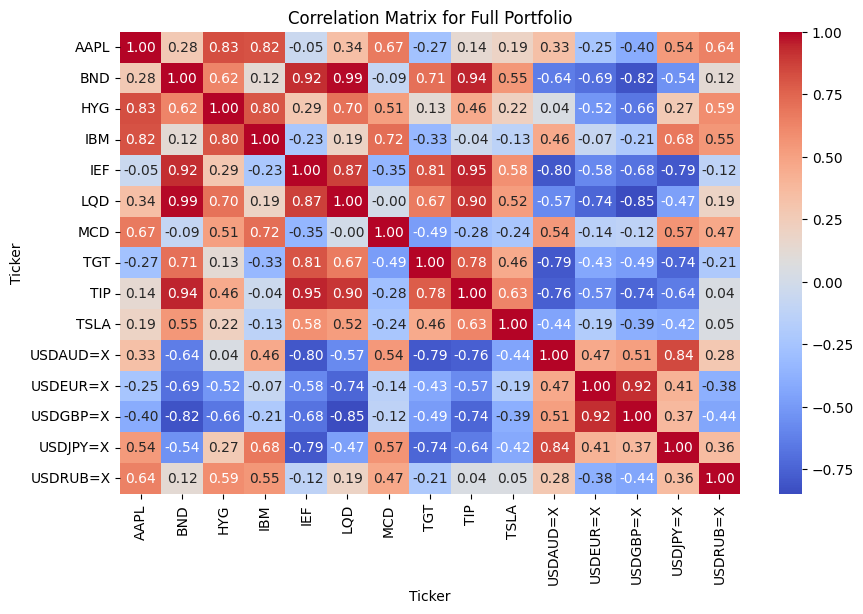

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_full.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title('Correlation Matrix for Full Portfolio')
plt.show()


In [28]:
mu_full = expected_returns.mean_historical_return(df_full)
S_cov_full = risk_models.sample_cov(df_full)
print(f'Expected Returns: {mu_full}')
print(f'Covariance Matrix: {S_cov_full}')


Expected Returns: Ticker
AAPL        0.205187
BND        -0.020213
HYG         0.026852
IBM         0.219339
IEF        -0.037933
LQD        -0.026228
MCD         0.079953
TGT        -0.136495
TIP        -0.017702
TSLA        0.157592
USDAUD=X    0.050492
USDEUR=X    0.034963
USDGBP=X    0.027232
USDJPY=X    0.112255
USDRUB=X    0.121649
dtype: float64
Covariance Matrix: Ticker        AAPL       BND       HYG       IBM       IEF       LQD  \
Ticker                                                                 
AAPL      0.072984  0.003433  0.013495  0.017025  0.002282  0.007792   
BND       0.003433  0.004689  0.003503  0.001065  0.005859  0.006325   
HYG       0.013495  0.003503  0.007532  0.006016  0.003678  0.005985   
IBM       0.017025  0.001065  0.006016  0.047109  0.000317  0.003066   
IEF       0.002282  0.005859  0.003678  0.000317  0.007665  0.007606   
LQD       0.007792  0.006325  0.005985  0.003066  0.007606  0.009511   
MCD       0.016690  0.001984  0.005301  0.010761  

In [29]:
# weigths full portfolio
EF_FULL = EfficientFrontier(mu_full,S_cov_full)
weights_full = EF_FULL.max_sharpe()
cleaned_weights_full = EF_FULL.clean_weights()
print(f'Weights for Full Portfolio: {cleaned_weights_full}')

Weights for Full Portfolio: OrderedDict([('AAPL', 0.1037), ('BND', 0.0), ('HYG', 0.0), ('IBM', 0.25293), ('IEF', 0.0), ('LQD', 0.0), ('MCD', 0.01406), ('TGT', 0.0), ('TIP', 0.0), ('TSLA', 0.0), ('USDAUD=X', 0.00212), ('USDEUR=X', 0.0), ('USDGBP=X', 0.0), ('USDJPY=X', 0.62695), ('USDRUB=X', 0.00024)])


In [30]:
## optimal share of all full portfolio
optimal_sharpe_full = EF_FULL.portfolio_performance()[2]
print(f'Optimal Sharpe Ratio for Full Portfolio: {optimal_sharpe_full}')

Optimal Sharpe Ratio for Full Portfolio: 1.5464767857932884


In [31]:
#expected returns,Risk and sharpe ratio of full portfolio

expected_return_full = EF_FULL.portfolio_performance()[0]
volatility_full = EF_FULL.portfolio_performance()[1]
sharpe_ratio_full = EF_FULL.portfolio_performance()[2]
print(f'Expected Returns on Full Portfolio: {expected_return_full}')
print(f'Standard Deviation (risk) of Full Portfolio: {volatility_full}')
print(f'Sharpe Ratio for Full Portfolio: {sharpe_ratio_full}')

Expected Returns on Full Portfolio: 0.14839435255329214
Standard Deviation (risk) of Full Portfolio: 0.09595640485296457
Sharpe Ratio for Full Portfolio: 1.5464767857932884


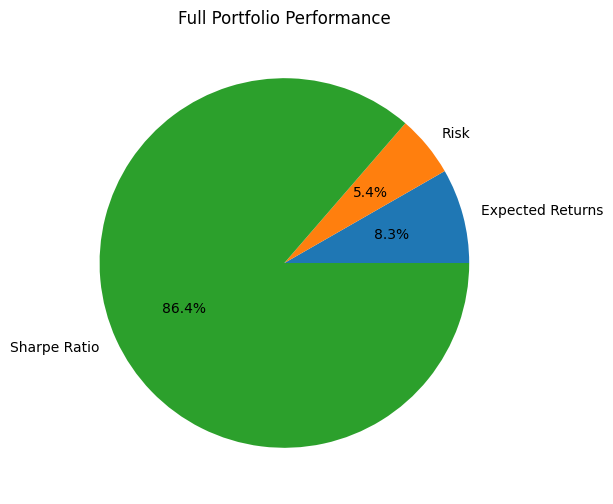

In [33]:
labels = ['Expected Returns','Risk','Sharpe Ratio']
values = [expected_return_full,volatility_full,sharpe_ratio_full]
plt.figure(figsize=(10,6))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Full Portfolio Performance')
plt.show()


In [34]:
### discrete allocation
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices = get_latest_prices(df_full)
print(latest_prices)
da = DiscreteAllocation(weights_full, latest_prices,total_portfolio_value=10000)

allocation, leftover = da.greedy_portfolio()
print('Discrete Allocation: ',allocation)
print('Left over cash',leftover)


Ticker
AAPL        254.490005
BND          72.209999
HYG          78.580002
IBM         223.360001
IEF          92.610001
LQD         106.980003
MCD         292.679993
TGT         131.479996
TIP         106.540001
TSLA        421.059998
USDAUD=X      1.604107
USDEUR=X      0.964790
USDGBP=X      0.800130
USDJPY=X    157.643997
USDRUB=X    103.492699
Name: 2024-12-20 00:00:00, dtype: float64
Discrete Allocation:  {'USDJPY=X': 39, 'IBM': 11, 'AAPL': 4, 'MCD': 1, 'USDAUD=X': 14}
Left over cash 61.826589822769165


In [35]:
### ok,index model

import statsmodels.api as sm
## stock tickers and S&P 500 ticker
stock_ticker = ['AAPL','IBM','^GSPC','TSLA','DIS','MCD']


df = yf.download(tickers=stock_ticker,start=start_date,end=end_date)['Adj Close']
df.head(10)

print(df.pct_change().dropna())



[*********************100%***********************]  6 of 6 completed

Ticker          AAPL       DIS       IBM       MCD      TSLA     ^GSPC
Date                                                                  
2021-10-12 -0.009103 -0.002248 -0.013761 -0.008354  0.017400 -0.002417
2021-10-13 -0.004240 -0.000982  0.002065 -0.007648  0.006652  0.003023
2021-10-14  0.020226  0.008383  0.018684  0.007830  0.008926  0.017063
2021-10-15  0.007513  0.011754  0.008508 -0.009405  0.030196  0.007460
2021-10-18  0.011806 -0.030149 -0.015836  0.000041  0.032122  0.003375
...              ...       ...       ...       ...       ...       ...
2024-12-16  0.011728 -0.006469 -0.006455  0.003742  0.061413  0.003799
2024-12-17  0.009720  0.008117 -0.001570 -0.005475  0.036370 -0.003864
2024-12-18 -0.021422 -0.014776 -0.038433 -0.017563 -0.082795 -0.029493
2024-12-19  0.007015  0.000180  0.017032 -0.002235 -0.008997 -0.000865
2024-12-20  0.018816  0.005926 -0.002501  0.008442 -0.034642  0.010869

[804 rows x 6 columns]


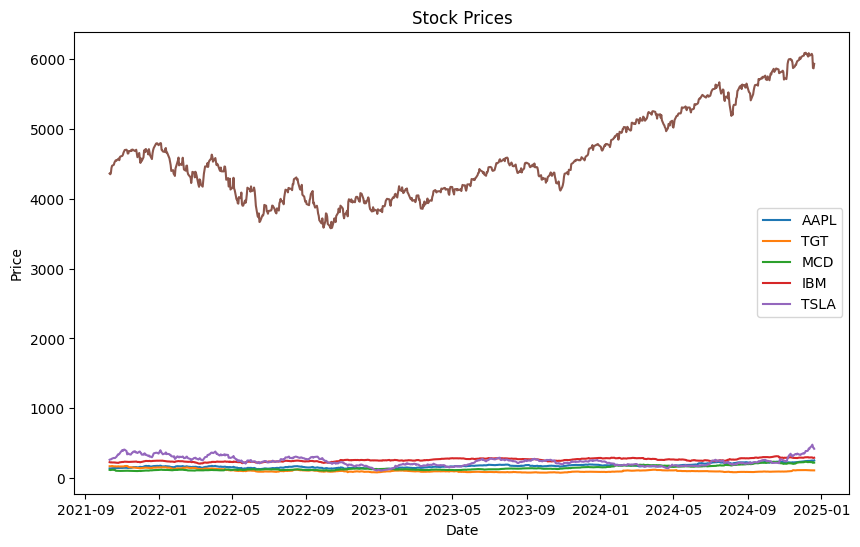

In [36]:

plt.figure(figsize=(10,6))
plt.plot(df)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(stock_tickers)
plt.show()

single index for each stock ticker                  AAPL  Excess_Return
Date                                 
2021-10-11  140.303589     140.293589
2021-10-12  139.026413     139.016413
2021-10-13  138.436935     138.426935
2021-10-14  141.236908     141.226908
2021-10-15  142.297989     142.287989
...                ...            ...
2024-12-16  251.039993     251.029993
2024-12-17  253.479996     253.469996
2024-12-18  248.050003     248.040003
2024-12-19  249.789993     249.779993
2024-12-20  254.490005     254.480005

[805 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3187.
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          9.11e-282
Time:                        20:21:17   Log-Likelihoo

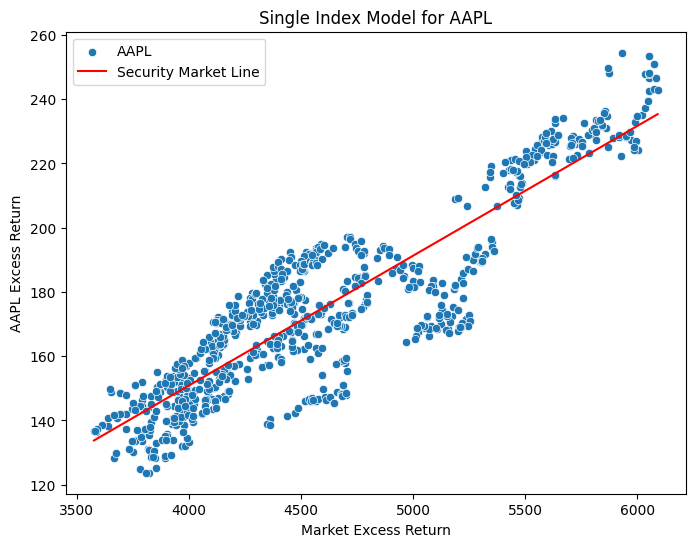

single index for each stock ticker                   IBM  Excess_Return
Date                                 
2021-10-11  118.638878     118.628878
2021-10-12  117.006287     116.996287
2021-10-13  117.247864     117.237864
2021-10-14  119.438553     119.428553
2021-10-15  120.454742     120.444742
...                ...            ...
2024-12-16  229.330002     229.320002
2024-12-17  228.970001     228.960001
2024-12-18  220.169998     220.159998
2024-12-19  223.919998     223.909998
2024-12-20  223.360001     223.350001

[805 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     2576.
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          9.15e-253
Time:                        20:21:18   Log-Likelihoo

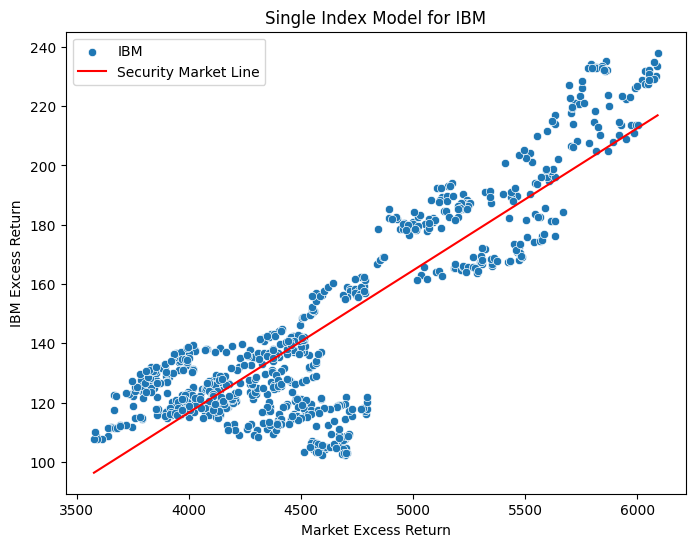

single index for each stock ticker                   MCD  Excess_Return
Date                                 
2021-10-11  228.989594     228.979594
2021-10-12  227.076584     227.066584
2021-10-13  225.339966     225.329966
2021-10-14  227.104416     227.094416
2021-10-15  224.968506     224.958506
...                ...            ...
2024-12-16  297.709991     297.699991
2024-12-17  296.079987     296.069987
2024-12-18  290.880005     290.870005
2024-12-19  290.230011     290.220011
2024-12-20  292.679993     292.669993

[805 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     381.1
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           9.24e-70
Time:                        20:21:20   Log-Likelihoo

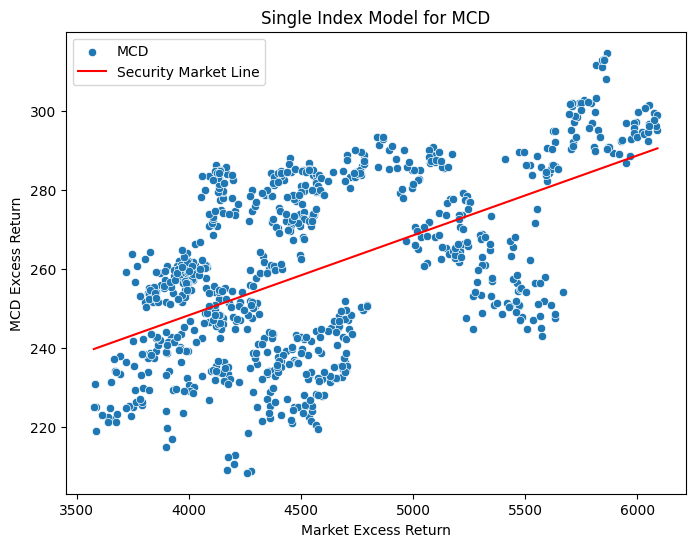

single index for each stock ticker                  TSLA  Excess_Return
Date                                 
2021-10-11  263.980011     263.970011
2021-10-12  268.573334     268.563334
2021-10-13  270.359985     270.349985
2021-10-14  272.773346     272.763346
2021-10-15  281.010010     281.000010
...                ...            ...
2024-12-16  463.019989     463.009989
2024-12-17  479.859985     479.849985
2024-12-18  440.130005     440.120005
2024-12-19  436.170013     436.160013
2024-12-20  421.059998     421.049998

[805 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     24.43
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           9.36e-07
Time:                        20:21:23   Log-Likelihoo

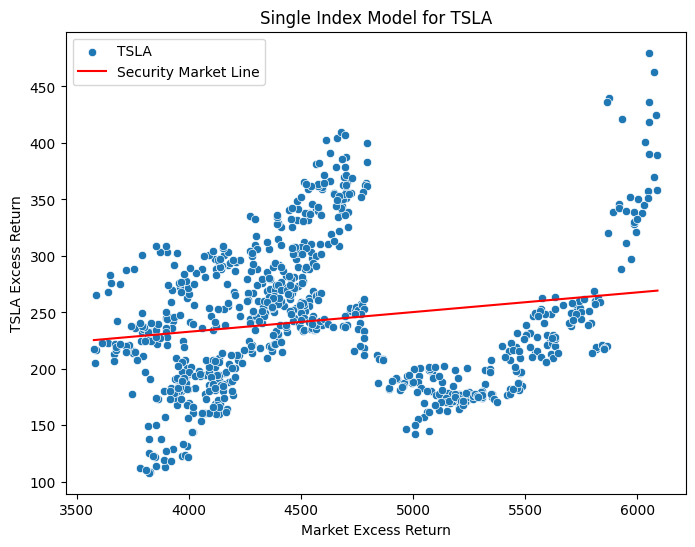

single index for each stock ticker                   DIS  Excess_Return
Date                                 
2021-10-11  171.402573     171.392573
2021-10-12  171.017334     171.007334
2021-10-13  170.849396     170.839396
2021-10-14  172.281693     172.271693
2021-10-15  174.306686     174.296686
...                ...            ...
2024-12-16  112.110001     112.100001
2024-12-17  113.019997     113.009997
2024-12-18  111.349998     111.339998
2024-12-19  111.370003     111.360003
2024-12-20  112.029999     112.019999

[805 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.878
Date:                Sun, 22 Dec 2024   Prob (F-statistic):              0.171
Time:                        20:21:25   Log-Likelihoo

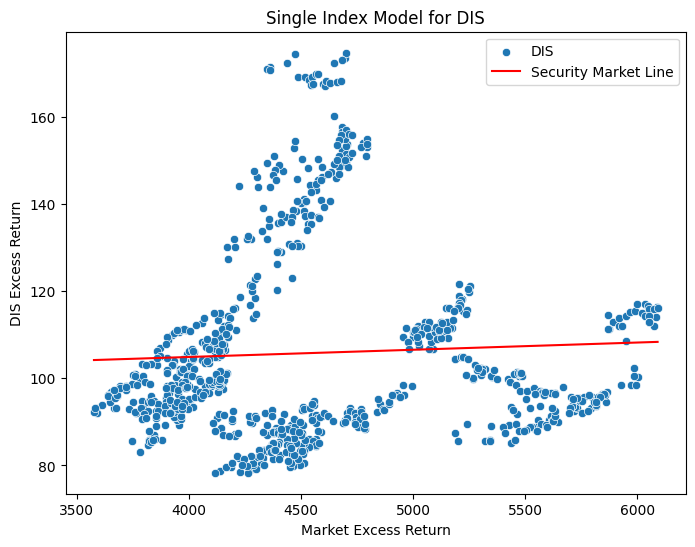

In [37]:
def single_index_model(stock_ticker, sp500, risk_free_rate):
    stock_data = df[stock_ticker].to_frame()
    sp500_data = df[sp500].to_frame()
    stock_data['Excess_Return'] = stock_data[stock_ticker] - risk_free_rate
    sp500_data['Excess_Return'] = sp500_data['^GSPC'] - risk_free_rate
    model = sm.OLS(endog=stock_data['Excess_Return'], exog=sm.add_constant(sp500_data['Excess_Return'])).fit()
    print(f'single index for each stock ticker{stock_data}')
    print(model.summary())
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=sp500_data['Excess_Return'], y=stock_data['Excess_Return'], label=stock_ticker)
    sns.lineplot(x=sp500_data['Excess_Return'], y=model.fittedvalues, color='red', label='Security Market Line')
    plt.title(f'Single Index Model for {stock_ticker}')
    plt.xlabel('Market Excess Return')
    plt.ylabel(f'{stock_ticker} Excess Return')
    plt.legend()
    plt.show()



single_index_model("AAPL","^GSPC",risk_free_rate=0.01)
single_index_model("IBM","^GSPC",risk_free_rate)
single_index_model("MCD","^GSPC",risk_free_rate)
single_index_model("TSLA",'^GSPC',risk_free_rate)
single_index_model("DIS","^GSPC",risk_free_rate)

In [38]:
## ok, time for clustering
df = yf.download(stock_tickers,start=start_date,end=end_date)
df.head(10)



[*********************100%***********************]  5 of 5 completed


Price        Adj Close                                                  \
Ticker            AAPL         IBM         MCD         TGT        TSLA   
Date                                                                     
2021-10-11  140.303589  118.638878  228.989594  209.992950  263.980011   
2021-10-12  139.026413  117.006287  227.076584  211.388474  268.573334   
2021-10-13  138.436935  117.247864  225.339966  217.365463  270.359985   
2021-10-14  141.236908  119.438553  227.104416  222.268204  272.773346   
2021-10-15  142.297989  120.454742  224.968506  225.591827  281.010010   
2021-10-18  143.977966  118.547279  224.977814  232.881699  290.036682   
2021-10-19  146.149170  118.264069  225.451447  231.541245  288.089996   
2021-10-20  146.640396  118.197418  222.618988  231.210739  288.600006   
2021-10-21  146.856522  106.894119  224.179138  233.395889  298.000000   
2021-10-22  146.080399  106.519287  221.430298  234.975052  303.226654   

Price            Close                                                  ...  \
Ticker            AAPL         IBM         MCD         TGT        TSLA  ...   
Date                                                                    ...   
2021-10-11  142.809998  136.166351  246.580002  228.720001  263.980011  ...   
2021-10-12  141.509995  134.292542  244.520004  230.240005  268.573334  ...   
2021-10-13  140.910004  134.569794  242.649994  236.750000  270.359985  ...   
2021-10-14  143.759995  137.084137  244.550003  242.089996  272.773346  ...   
2021-10-15  144.839996  138.250473  242.250000  245.710007  281.010010  ...   
2021-10-18  146.550003  136.061188  242.259995  253.649994  290.036682  ...   
2021-10-19  148.759995  135.736145  242.770004  252.190002  288.089996  ...   
2021-10-20  149.259995  135.659653  239.720001  251.830002  288.600006  ...   
2021-10-21  149.479996  122.686424  241.399994  254.210007  298.000000  ...   
2021-10-22  148.690002  122.256210  238.440002  255.929993  303.226654  ...   

Price             Open                                                  \
Ticker            AAPL         IBM         MCD         TGT        TSLA   
Date                                                                     
2021-10-11  142.270004  137.189301  248.100006  228.570007  262.549988   
2021-10-12  143.229996  135.956024  247.729996  230.000000  266.976654   
2021-10-13  141.240005  134.340347  243.270004  231.500000  270.156677   
2021-10-14  142.110001  134.837479  242.880005  238.800003  271.829987   
2021-10-15  143.770004  137.084137  245.240005  243.300003  274.579987   
2021-10-18  143.449997  137.667297  242.419998  244.949997  283.929993   
2021-10-19  147.009995  134.875717  243.220001  254.529999  292.510010   
2021-10-20  148.699997  135.449326  240.399994  254.309998  288.450012   
2021-10-21  148.809998  127.638626  240.169998  251.619995  285.333344   
2021-10-22  149.690002  122.418739  240.710007  255.479996  298.500000   

Price         Volume                                        
Ticker          AAPL       IBM      MCD      TGT      TSLA  
Date                                                        
2021-10-11  64452200   2921792  1504000  1998600  42600900  
2021-10-12  73035900   3293436  2346700  2167400  66060000  
2021-10-13  78762700   3013003  3214300  3984700  42360300  
2021-10-14  69907100   4410668  2512000  4281700  36741600  
2021-10-15  67940300   3371049  2564700  3626900  56773800  
2021-10-18  85589200   6437189  2484900  4365800  72621600  
2021-10-19  76378900   4539117  2071600  3204800  52143300  
2021-10-20  58418800   6474008  3040200  2209300  42096300  
2021-10-21  61421000  32913959  2702400  1758400  94444500  
2021-10-22  58883400  12114981  3283700  2205700  68642400  

[10 rows x 30 columns]

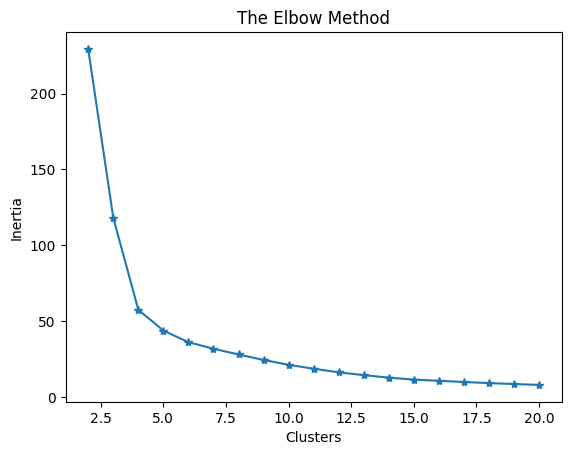

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df[['Adj Close','Close','High','Volume']]
X_scaled = MinMaxScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cc = []
for i in range(2,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=42).fit(X_pca)
    cc.append(kmeans.inertia_)



### The Elbow Method
plt.plot(range(2,21),cc,marker='*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()







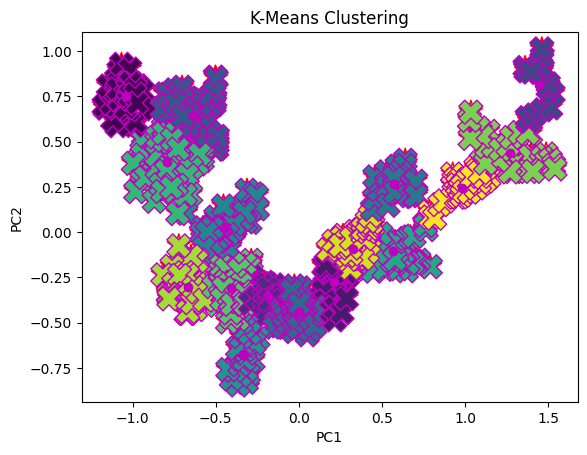

In [40]:
#optimal cluster at k = 16


kmeans = KMeans(n_clusters=16,init='k-means++',n_init=20,random_state=42).fit(X_pca)
labels = kmeans.fit_predict(X_pca)
X['Cluster 1'] = labels
X['Cluster 2'] = labels


plt.scatter(X_pca[:,0],X_pca[:,1],c=X['Cluster 1'],s=300,marker='*',edgecolors='r')
plt.scatter(X_pca[:,0],X_pca[:,1],c=X['Cluster 2'],s=300,marker='X',edgecolors='m')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='o',color='m')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()




In [41]:
#sh score


from sklearn.metrics import silhouette_score
lables = kmeans.fit_predict(X_pca)
X['Cluster'] = labels
sh = silhouette_score(X_pca, labels)
print(f'The silhoutte score is {sh*100:.2f}%')
print(kmeans.inertia_)


The silhoutte score is 44.68%
10.607185768884218
